In [57]:
import numpy as np

In [58]:
numberOfAntennas = 2
phaseDifferenceBetweenAntennasInDegrees = 30
frequencyOfOperationInHertz = 5.*10**(8) #500Mhz
speedOfPropogationInMedium = 3.*10**(8) #speed of light in meters per second
distanceBetweenFirstAndLastAntenna = 2 #in meters

In [59]:
wavelength = frequencyOfOperationInHertz/speedOfPropogationInMedium
distanceBetweenAdjacentAntennas = float(distanceBetweenFirstAndLastAntenna)/numberOfAntennas
numberOfPointsToConsiderForPlotting = 360

In [60]:
sumOfComplexExponentials = np.zeros(numberOfPointsToConsiderForPlotting)
for theta in range(numberOfPointsToConsiderForPlotting):
    for i in range(numberOfAntennas):
        sumOfComplexExponentials[theta] += np.exp(-1j*2*np.pi/wavelength*distanceBetweenFirstAndLastAntenna*np.sin(2*np.pi*theta/360.)*i+1j*phaseDifferenceBetweenAntennasInDegrees*i)
    sumOfComplexExponentials[theta] = np.abs(sumOfComplexExponentials[theta])**2

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  after removing the cwd from sys.path.


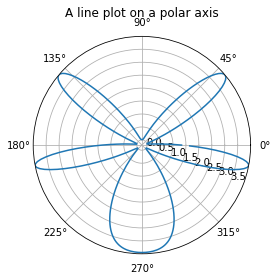

In [61]:
import matplotlib.pyplot as plt

r = sumOfComplexExponentials
theta = np.arange(0,2*np.pi,2*np.pi/numberOfPointsToConsiderForPlotting)

ax = plt.subplot(111, projection='polar')
ax.plot(theta, r)
ax.set_rmax(max(sumOfComplexExponentials))
#ax.set_rticks([0.5, 1, 1.5, 2])  # less radial ticks
ax.set_rlabel_position(-22.5)  # get radial labels away from plotted line
ax.grid(True)

ax.set_title("A line plot on a polar axis", va='bottom')
plt.show();